In [1]:
/* Crea una tabla llamada Shippers con los siguientes campos:
ShipperID (int, identity, primary key)
ShipperName (varchar(20), not null)
Shipping_Cost_Percent (float, not null)
Inserta los los nombres de las compañias de envio y el porcentaje de costo de envio con valores al azar generados pro chatgpt.
*/
CREATE TABLE Shippers (
	ShipperID INT identity(1,1) PRIMARY KEY,
	ShipperName VARCHAR(20) NOT NULL,
	Shipping_Cost_Percent FLOAT NOT NULL
)
INSERT INTO Shippers (ShipperName, Shipping_Cost_Percent)
VALUES
    ('SwiftCargo', 0.1050),
    ('StarShip Express', 0.1575),
    ('JetStream Logistics', 0.1225),
    ('ThunderTrans', 0.0890),
    ('CosmoMovers', 0.1160),
    ('AeroSwift Shipping', 0.1420),
    ('ZephyrFreight', 0.0980),
    ('MagmaTrans', 0.1345),
    ('Eclipse Logistics', 0.1075),
    ('GalaxyHaulers', 0.1630);

(10 rows affected)

Total execution time: 00:00:00.086

In [2]:
/* Crear una tabla llamada Cities con los siguientes campos:
CityID (int, autoincremental, primary key)
CityName (varchar(50), not null)
Country (varchar(50), not null)
Insertar 27 ciudades en la tabla, con sus respectivos países, proporcionados por chatgpt.
*/
CREATE TABLE Cities (
	CityID INT IDENTITY(1,1) PRIMARY KEY,
	CityName VARCHAR(50) NOT NULL,
	Country VARCHAR(50) NOT NULL
)

INSERT INTO Cities (CityName, Country)
VALUES
    ('New York', 'United States'),
    ('London', 'United Kingdom'),
    ('Tokyo', 'Japan'),
    ('Paris', 'France'),
    ('Sydney', 'Australia'),
    ('Rome', 'Italy'),
    ('Beijing', 'China'),
    ('Cairo', 'Egypt'),
    ('Moscow', 'Russia'),
    ('Toronto', 'Canada'),
    ('Buenos Aires', 'Argentina'),
    ('Amsterdam', 'Netherlands'),
    ('Dubai', 'United Arab Emirates'),
    ('Istanbul', 'Turkey'),
    ('Rio de Janeiro', 'Brazil'),
    ('Mumbai', 'India'),
    ('Barcelona', 'Spain'),
    ('Berlin', 'Germany'),
    ('Bangkok', 'Thailand'),
    ('Cape Town', 'South Africa'),
    ('Seoul', 'South Korea'),
    ('Vienna', 'Austria'),
    ('San Francisco', 'United States'),
    ('Singapore', 'Singapore'),
    ('Prague', 'Czech Republic'),
    ('Athens', 'Greece'),
    ('Auckland', 'New Zealand')

(27 rows affected)

Total execution time: 00:00:00.094

In [3]:
/* Crear Nuevos Campos */
-- add age to employees
ALTER TABLE Employees
ADD Age INT;

-- add age, cityid to customers
ALTER TABLE Customers
ADD Age INT;
ALTER TABLE Customers
ADD CityID INT;

-- cityid must be a foreign key to cities
ALTER TABLE Customers 
ADD CONSTRAINT FK_Customers_Cities
FOREIGN KEY (CityID) REFERENCES Cities(CityID);

-- add city of products
ALTER TABLE Products
ADD CityID INT;

-- cityid must be a foreign key to cities
ALTER TABLE Products 
ADD CONSTRAINT FK_Products_Cities
FOREIGN KEY (CityID) REFERENCES Cities(CityID);

-- add shippers to each sale
ALTER TABLE Sales
ADD ShipperID INT;
-- shipperid must be a foreign key to shippers
ALTER TABLE Sales
ADD CONSTRAINT FK_Sales_Shippers
FOREIGN KEY (ShipperID) REFERENCES Shippers(ShipperID);

Commands completed successfully.

Total execution time: 00:00:00.736

In [4]:
/* Llenar nuevos campos con datos aleatorios */
UPDATE Sales SET ShipperID = FLOOR(RAND(CHECKSUM(NEWID()))* (10) +1 ); 

UPDATE Customers SET CityID = FLOOR(RAND(CHECKSUM(NEWID())) * (27) + 1 );
UPDATE Products SET CityID = FLOOR(RAND(CHECKSUM(NEWID())) * (27) + 1 );

UPDATE Customers SET Age = FLOOR(RAND(CHECKSUM(NEWID())) * (70 - 18 + 1) + 18);
UPDATE Employees SET Age = FLOOR(RAND(CHECKSUM(NEWID())) * (40 - 22 ) + 22);

(6715221 rows affected)

(19759 rows affected)

(504 rows affected)

(19759 rows affected)

(23 rows affected)

Total execution time: 00:01:23.027

\# algunas consultas simples

In [1]:
/* Top 50 de Customers: Customers más plata han Gastan */
SELECT Top(50) 
    CONCAT (Customers.FirstName, ' ', Customers.LastName) as client,
    SUM(Products.Price*sales.Quantity) AS venta
FROM Customers 
    JOIN sales on Customers.CustomerID = Sales.CustomerID 
    JOIN Products on Products.ProductID = Sales.ProductID
Group BY CONCAT (Customers.FirstName, ' ', Customers.LastName)
Order BY venta DESC

(50 rows affected)

Total execution time: 00:00:02.643

client,venta
Darryl Hu,70901002033.35
Dalton Coleman,70565366033.52
Natalie Sanders,67919141236.04
Frank Munoz,51226777125.23
Samantha Taylor,49244089224.94
Wyatt Thompson,38451147673.85
Jeremy Wright,37277067463.64
Richard White,36053081079.66
Walter Navarro,31782541136.18
Bruce Torres,29017836751.51


In [2]:
/* Top 50 de Customers: Customers más pedidos hacen */
SELECT Top(50) 
    CONCAT (Customers.FirstName, ' ', Customers.LastName) as client,
    COUNT(sales.SalesID) AS n_compras
FROM Customers 
    JOIN sales on Customers.CustomerID = Sales.CustomerID 
    JOIN Products on Products.ProductID = Sales.ProductID
Group BY CONCAT (Customers.FirstName, ' ', Customers.LastName)
ORDER BY n_compras DESC

(50 rows affected)

Total execution time: 00:00:00.916

client,n_compras
Richard White,38907
Eduardo Walker,38790
Marcus Gray,38341
Caleb Parker,37814
Deanna Moreno,34023
Nancy Chapman,33336
Alan Guo,33207
Paige Ramirez,33188
Mark Lee,33010
Isaac James,32981


In [4]:
/* Ranked Principales Shippers: Los que más envíos hacen */
SELECT TOP(5)
	Shippers.ShipperName, 
	COUNT(sales.SalesID) AS n_Envios
FROM sales 
	JOIN Shippers on Shippers.ShipperID = Sales.ShipperID
GROUP BY Shippers.ShipperName
Order By n_Envios  DESC

(5 rows affected)

Total execution time: 00:00:01.155

ShipperName,n_Envios
AeroSwift Shipping,673214
JetStream Logistics,672261
CosmoMovers,672202
GalaxyHaulers,671847
ZephyrFreight,671774


In [5]:
/* Ranked Principales Shippers: COSTOS DE ENVÍO  */
SELECT Top(5)
	Shippers.ShipperName, 
	SUM(Shippers.Shipping_Cost_Percent *  sales.Quantity * Products.Price ) AS Costo_Envios
FROM sales 
	JOIN Shippers on Shippers.ShipperID = Sales.ShipperID
	JOIN Products on Sales.ProductID = Products.ProductID
GROUP BY Shippers.ShipperName
Order By Costo_Envios DESC

(5 rows affected)

Total execution time: 00:00:04.969

ShipperName,Costo_Envios
GalaxyHaulers,30437439878.378532
StarShip Express,29262427306.63086
AeroSwift Shipping,26609357186.44352
MagmaTrans,25166816420.32429
JetStream Logistics,22837066381.89254


In [6]:
/* Ranked Productos: Productos más vendidos */
SELECT 
	TOP(10)
	Products.Name,
	sum(sales.Quantity) as n_ventas
FROM Products
	Join Sales on sales.ProductID = Products.ProductID
group by Products.Name
order by n_ventas desc

(10 rows affected)

Total execution time: 00:00:01.066

Name,n_ventas
"Touring-3000 Blue, 54",32886900
LL Road Seat/Saddle,30968983
Touring Pedal,30021052
Rear Derailleur,29975003
ML Mountain Tire,29085729
Headlights - Weatherproof,28913399
"ML Mountain Frame - Black, 44",27875123
"ML Mountain Frame-W - Silver, 38",27486126
LL Road Front Wheel,27396348
"Touring-3000 Blue, 58",26872899


In [7]:
/* Top 5 de ciudades con más pedidos y el producto más comprado en cada una de ellas */
SELECT TOP(5)
    Cities.CityName,
    COUNT(Sales.SalesID) as n_pedidos,
    r.Name as producto_mas_comprado
FROM Cities
JOIN Customers ON Customers.CityID = Cities.CityID
JOIN Sales ON Sales.CustomerID = Customers.CustomerID
JOIN (
    /* 
        Tabla con el producto más comprado por ciudad
    */
    SELECT Cityname, quant, Name, CityID
    FROM (
		/*  
		    Tabla con la cantidad de productos vendidos por ciudad y producto, 
            ordenada de mayor a menor y con un número de fila para subtabla de cada ciudad.
		*/
        SELECT Cities.Cityname, SUM(Sales.Quantity) as quant, products.Name, Cities.CityID,
               ROW_NUMBER() OVER (PARTITION BY Cities.Cityname ORDER BY SUM(Sales.Quantity) DESC) as rn
        FROM products
        JOIN sales ON Sales.ProductID = Products.ProductID
        JOIN Customers ON Sales.CustomerID = Customers.CustomerID
        JOIN Cities ON Customers.CityID = Cities.CityID
        GROUP BY Cities.Cityname, Cities.CityID, products.Name
    ) as t
    WHERE rn = 1
) as r ON r.CityID = Cities.CityID
GROUP BY Cities.CityName, r.Name
ORDER BY n_pedidos DESC;

(5 rows affected)

Total execution time: 00:00:06.506

CityName,n_pedidos,producto_mas_comprado
Tokyo,425527,Lock Nut 16
Cairo,422166,"Touring-3000 Blue, 58"
Auckland,328185,Chainring Nut
Athens,318773,LL Road Seat/Saddle
Moscow,316679,"Touring-3000 Blue, 62"


In [8]:
/* Edades que más compras hacen */

SELECT top(5) customers.Age , Count(Sales.SalesID) as n_pedidos
From customers
	Join Sales on Sales.CustomerID = customers.CustomerID
Group by customers.Age
Order by n_pedidos desc

(5 rows affected)

Total execution time: 00:00:00.985

Age,n_pedidos
38,350860
56,242370
54,236692
64,219971
50,218490


In [9]:
/* Fracción de Envíos locales vs total de envíos */

Select total_envios.city_name, (local_envios.local_envios*100 / total_envios.total_envios) as porcentaje_envios_locales
From (
    SELECT top(500) cities.cityname as city_name, count(sales.salesid) as total_envios
    From sales
        join customers on sales.customerid = customers.customerid
        join products on sales.productid = products.productid
        join cities on customers.cityid = cities.cityid
    group by cities.cityname
) as total_envios
left Join (
    SELECT top(500) cities.cityname as city_name, count(sales.salesid) as local_envios
    From sales
        join customers on sales.customerid = customers.customerid
        join products on (products.CityID = customers.CityID and products.productid = sales.productid) 
        join cities on customers.cityid = cities.cityid
    group by cities.cityname
) as local_envios on total_envios.city_name = local_envios.city_name
order by porcentaje_envios_locales desc

(27 rows affected)

Total execution time: 00:00:03.909

city_name,porcentaje_envios_locales
Paris,9
Cairo,7
Amsterdam,7
Seoul,3
Dubai,2
San Francisco,2
Beijing,2
Bangkok,1
Prague,1
Rio de Janeiro,1


In [19]:
CREATE NONCLUSTERED INDEX IDX_CityName
on Cities(CityName)

Commands completed successfully.

Total execution time: 00:00:00.117

In [23]:
EXECUTE sp_helpindex 'Cities'

Commands completed successfully.

Total execution time: 00:00:00.103

index_name,index_description,index_keys
IDX_CityName,nonclustered located on PRIMARY,CityName
PK__Cities__F2D21A96AC86D056,"clustered, unique, primary key located on PRIMARY",CityID


In [22]:
CREATE NONCLUSTERED INDEX IDX_CustomerFirstName
on Customers(FirstName)

Commands completed successfully.

Total execution time: 00:00:00.177

In [24]:
EXECUTE sp_helpindex 'Customers'

Commands completed successfully.

Total execution time: 00:00:00.102

index_name,index_description,index_keys
CustomerPK,"clustered, unique, primary key located on PRIMARY",CustomerID
IDX_CustomerFirstName,nonclustered located on PRIMARY,FirstName


In [25]:
CREATE NONCLUSTERED INDEX IDX_ProductName
on Products(Name)

Commands completed successfully.

Total execution time: 00:00:00.125

In [27]:
EXECUTE sp_helpindex 'Products'

Commands completed successfully.

Total execution time: 00:00:00.104

index_name,index_description,index_keys
IDX_ProductName,nonclustered located on PRIMARY,Name
ProductsPK,"clustered, unique, primary key located on PRIMARY",ProductID


In [6]:
CREATE PROCEDURE PRODUCTOS_MAS_VENDIDOS
/* Ranked Productos: Productos más vendidos */
AS
BEGIN
    SELECT TOP 10
        Products.Name,
        SUM(Sales.Quantity) AS n_ventas
    FROM Products
    JOIN Sales ON Sales.ProductID = Products.ProductID
    GROUP BY Products.Name
    ORDER BY n_ventas DESC;
END;

Commands completed successfully.

Total execution time: 00:00:00.115

In [8]:
EXECUTE PRODUCTOS_MAS_VENDIDOS;

(10 rows affected)

Total execution time: 00:00:01.071

Name,n_ventas
"Touring-3000 Blue, 54",32886900
LL Road Seat/Saddle,30968983
Touring Pedal,30021052
Rear Derailleur,29975003
ML Mountain Tire,29085729
Headlights - Weatherproof,28913399
"ML Mountain Frame - Black, 44",27875123
"ML Mountain Frame-W - Silver, 38",27486126
LL Road Front Wheel,27396348
"Touring-3000 Blue, 58",26872899


In [10]:
CREATE PROCEDURE CIUDADES_MAS_PEDIDOS_PRODUCTO_MAS_COMPRADO
    @ciudad varchar(10)
AS
BEGIN
    /* Cuerpo del procedimiento almacenado */
    /* Top de ciudades con más pedidos y el producto más comprado en cada una de ellas */
    SELECT TOP(10)
        Cities.CityName,
        COUNT(Sales.SalesID) as n_pedidos,
        r.Name as producto_mas_comprado
    FROM Cities
    JOIN Customers ON Customers.CityID = Cities.CityID
    JOIN Sales ON Sales.CustomerID = Customers.CustomerID
    JOIN (
        /* Tabla con el producto más comprado por ciudad */
        SELECT Cityname, quant, Name, CityID
        FROM (
            /* Tabla con la cantidad de productos vendidos por ciudad y producto, ordenada de mayor a menor */
            SELECT Cities.Cityname, SUM(Sales.Quantity) as quant, products.Name, Cities.CityID,
                   ROW_NUMBER() OVER (PARTITION BY Cities.Cityname ORDER BY SUM(Sales.Quantity) DESC) as rn
            FROM products
            JOIN sales ON Sales.ProductID = Products.ProductID
            JOIN Customers ON Sales.CustomerID = Customers.CustomerID
            JOIN Cities ON Customers.CityID = Cities.CityID
            GROUP BY Cities.Cityname, Cities.CityID, products.Name
        ) as t
        WHERE rn = 1
    ) as r ON r.CityID = Cities.CityID
    WHERE Cities.CityName = @ciudad -- Filtro por la ciudad proporcionada como parámetro
    GROUP BY Cities.CityName, r.Name
    ORDER BY n_pedidos DESC;
END;


Commands completed successfully.

Total execution time: 00:00:00.112

In [11]:
EXECUTE CIUDADES_MAS_PEDIDOS_PRODUCTO_MAS_COMPRADO Paris;

(1 row affected)

Total execution time: 00:00:05.948

CityName,n_pedidos,producto_mas_comprado
Paris,221891,"Classic Vest, M"


  

Monitor de tareas 

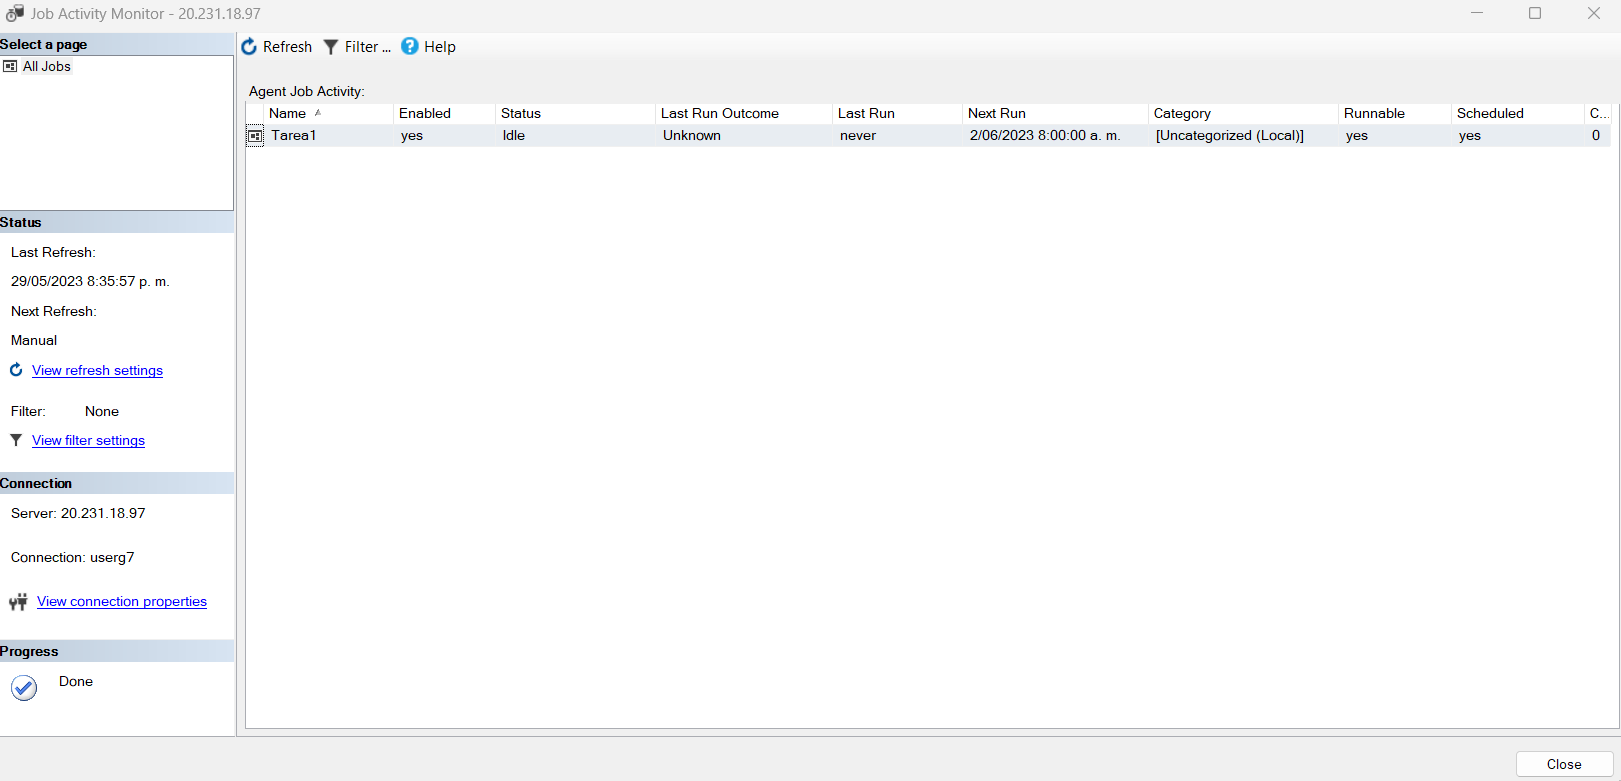

Se crea el JOB con el fin de ejecutar el almacenamiento programado creado anteriomente

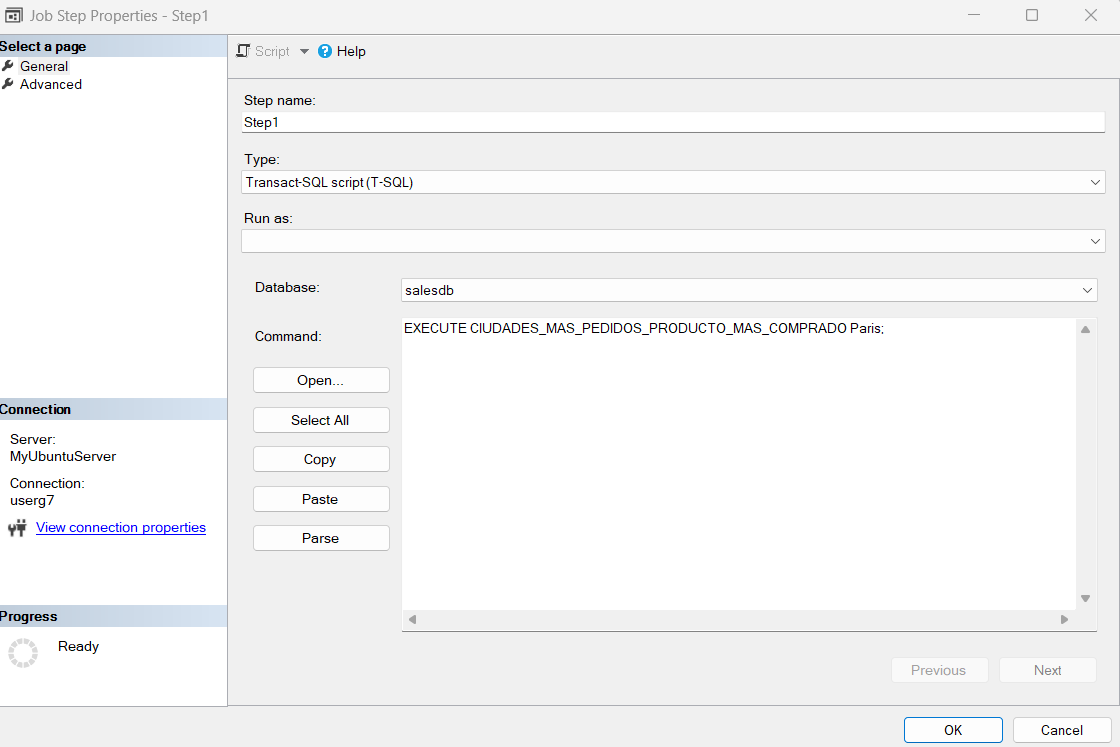